# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "DAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'DAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.320  1  0.572 0.450 0.003   
                             age        0.069  1  0.123 0.726 0.001   
                             Kiel       1.953  1  3.494 0.063 0.018   
                             Magdeburg  5.022  1  8.987 0.003 0.045   
                             Sweden     8.029  1 14.368 0.000 0.070   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.042  1  0.044 0.834 0.000   
                             age        0.003  1  0.003 0.958 0.000   
                             Kiel       0.182  1  0.193 0.661 0.001   
                             Magdeburg  1.231  1  1.306 0.255 0.007   
                             Sweden    22.386  1 23.740 0.000 0.111   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.346  0.609    False  
                             age               0.139  0.833    False  
                             Kiel              1.200  0.147    False  
                             Magdeburg         2.511  0.013     True  
                             Sweden            3.696  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.079  0.905    False  
                             age               0.019  0.976    False  
                             Kiel              0.180  0.781    False  
                             Magdeburg         0.594  0.412    False  
                             Sweden            5.637  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     DAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.085  1  7.868 0.006 0.040   
                             age        0.006  1  0.041 0.840 0.000   
                             Kiel       0.268  1  1.946 0.165 0.010   
                             Magdeburg  0.461  1  3.347 0.069 0.017   
                             Sweden     1.674  1 12.145 0.001 0.060   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.909  1  5.256 0.023 0.027   
                             age        0.619  1  1.118 0.292 0.006   
                             Kiel       3.689  1  6.666 0.011 0.034   
                             Magdeburg  3.281  1  5.930 0.016 0.030   
                             Sweden    27.083  1 48.940 0.000 0.204   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.256  0.016     True  
                             age               0.076  0.897    False  
                             Kiel              0.783  0.268    False  
                             Magdeburg         1.162  0.134    False  
                             Sweden            3.214  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.639  0.054    False  
                             age               0.535  0.418    False  
                             Kiel              1.976  0.028     True  
                             Magdeburg         1.801  0.040     True  
                             Sweden           10.363  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                    DAE                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.006         2.256  0.016     True   
                             age       0.840         0.076  0.897    False   
                             Kiel      0.165         0.783  0.268    False   
                             Magdeburg 0.069         1.162  0.134    False   
                             Sweden    0.001         3.214  0.002     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.023         1.639  0.054    False   
                             age       0.292         0.535  0.418    False   
                             Kiel      0.011         1.976  0.028     True   
                             Magdeburg 0.016         1.801  0.040     True   
                             Sweden    0.000        10.363  0.000     True   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.450         0.346  0.609    False  
                             age       0.726         0.139  0.833    False  
                             Kiel      0.063         1.200  0.147    False  
                             Magdeburg 0.003         2.511  0.013     True  
                             Sweden    0.000         3.696  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.834         0.079  0.905    False  
                             age       0.958         0.019  0.976    False  
                             Kiel      0.661         0.180  0.781    False  
                             Magdeburg 0.255         0.594  0.412    False  
                             Sweden    0.000         5.637  0.000     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'DAE': 'DAE', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.225         3.263     0.278     0.262         2.481     0.339
std       0.295         6.164     0.322     0.304         5.339     0.332
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.001         0.407     0.002     0.004         0.329     0.015
50%       0.059         1.227     0.119     0.122         0.914     0.244
75%       0.392         3.282     0.523     0.468         2.437     0.624
max       1.000        86.650     1.000     1.000       144.664     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                       DAE                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.006         2.256   
A0A024R0T9;K7ER74;P02655                           AD     0.032         1.501   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.184         0.736   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.256         0.592   
A0A075B6H7                                         AD     0.019         1.730   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.205         0.689   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.684         0.165   
S4R3U6                                             AD     0.023         1.639   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.016     True   
A0A024R0T9;K7ER74;P02655                           AD      0.070    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.294    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.380    False   
A0A075B6H7                                         AD      0.045     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.282    False   
Q9Y6X5                                             AD      0.320    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.156    False   
Q9Y6Y9                                             AD      0.781    False   
S4R3U6                                             AD      0.054    False   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.450         0.346   
A0A024R0T9;K7ER74;P02655                           AD     0.040         1.402   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.178         0.750   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.465         0.333   
A0A075B6H7                                         AD     0.114         0.942   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.027         1.567   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.433         0.363   
S4R3U6                                             AD     0.834         0.079   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.609    False  
A0A024R0T9;K7ER74;P02655                           AD      0.101    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.320    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.621    False  
A0A075B6H7                                         AD      0.233    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.239         1.602     0.299     0.253         1.409     0.336
std       0.291         1.879     0.315     0.290         1.641     0.317
min       0.000         0.002     0.000     0.000         0.002     0.000
25%       0.006         0.390     0.018     0.012         0.363     0.039
50%       0.093         1.031     0.170     0.124         0.905     0.247
75%       0.408         2.191     0.538     0.434         1.918     0.595
max       0.994        23.592     0.996     0.996        23.731     0.997

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,DAE,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,935,1030


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

DAE                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.006         2.256  0.016   
A0A024R0T9;K7ER74;P02655                           0.032         1.501  0.070   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.184         0.736  0.294   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.256         0.592  0.380   
A0A075B6H7                                         0.019         1.730  0.045   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.282   
Q9Y6X5                                             0.205         0.689  0.320   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.156   
Q9Y6Y9                                             0.684         0.165  0.781   
S4R3U6                                             0.023         1.639  0.054   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.450   
A0A024R0T9;K7ER74;P02655                              False 0.040   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.178   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.465   
A0A075B6H7                                             True 0.114   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.027   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.433   
S4R3U6                                                False 0.834   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.346  0.609   
A0A024R0T9;K7ER74;P02655                                   1.402  0.101   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.750  0.320   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.333  0.621   
A0A075B6H7                                                 0.942  0.233   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.316   
Q9Y6X5                                                     1.567  0.075   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.183   
Q9Y6Y9                                                     0.363  0.595   
S4R3U6                                                     0.079  0.905   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                              

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
DAE (no)  - PI (no)    881
DAE (yes) - PI (yes)   337
DAE (yes) - PI (no)    149
DAE (no)  - PI (yes)    54
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


DAE                                  PI  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.006         2.256  0.016     True 0.450   
A0A075B6H7                   0.019         1.730  0.045     True 0.114   
A0A075B6H9                   0.020         1.708  0.047     True 0.377   
A0A075B6I0                   0.001         3.145  0.003     True 0.020   
A0A075B6J9                   0.018         1.753  0.043     True 0.027   
...                            ...           ...    ...      ...   ...   
Q9UJ14                       0.017         1.757  0.043     True 0.071   
Q9UKB5                       0.197         0.706  0.311    False 0.014   
Q9UP79                       0.000         4.499  0.000     True 0.504   
Q9UQ52                       0.000         3.353  0.002     True 0.042   
Q9Y6C2                       0.001         3.288  0.002     True 0.761   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         0.346  0.609    False       186  
A0A075B6H7                           0.942  0.233    False        91  
A0A075B6H9                           0.424  0.541    False       189  
A0A075B6I0                           1.707  0.058    False       194  
A0A075B6J9                           1.566  0.076    False       156  
...                                    ...    ...      ...       ...  
Q9UJ14                               1.148  0.161    False       169  
Q9UKB5                               1.841  0.046     True       148  
Q9UP79                               0.297  0.657    False       135  
Q9UQ52                               1.375  0.106    False       188  
Q9Y6C2                               0.118  0.854    False       119  

[203 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,DAE,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.016,0.609,186,DAE (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.070,0.101,195,DAE (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.294,0.320,174,DAE (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.380,0.621,196,DAE (no) - PI (no)
A0A075B6H7,0.045,0.233,91,DAE (yes) - PI (no)
...,...,...,...,...
Q9Y6R7,0.282,0.316,197,DAE (no) - PI (no)
Q9Y6X5,0.320,0.075,173,DAE (no) - PI (no)
Q9Y6Y8;Q9Y6Y8-2,0.156,0.183,197,DAE (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,DAE,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P51688,0.006,0.974,58,DAE (yes) - PI (no),0.968
Q16853;Q16853-2,0.018,0.974,167,DAE (yes) - PI (no),0.956
A0A087WXE9;E9PQ70;Q6UXH9;Q6UXH9-2;Q6UXH9-3,0.011,0.950,108,DAE (yes) - PI (no),0.939
O15204;O15204-2,0.017,0.954,156,DAE (yes) - PI (no),0.936
P22692;P22692-2,0.034,0.968,170,DAE (yes) - PI (no),0.934
...,...,...,...,...,...
F5GY80;F5H7G1;P07358,0.046,0.057,197,DAE (yes) - PI (no),0.011
Q9NX62,0.045,0.055,197,DAE (yes) - PI (no),0.010
O43916,0.052,0.042,162,DAE (no) - PI (yes),0.010


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_1_DAE


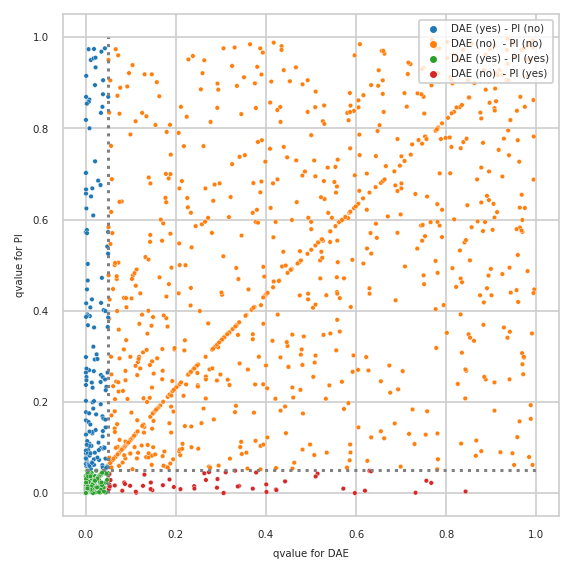

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_2_DAE


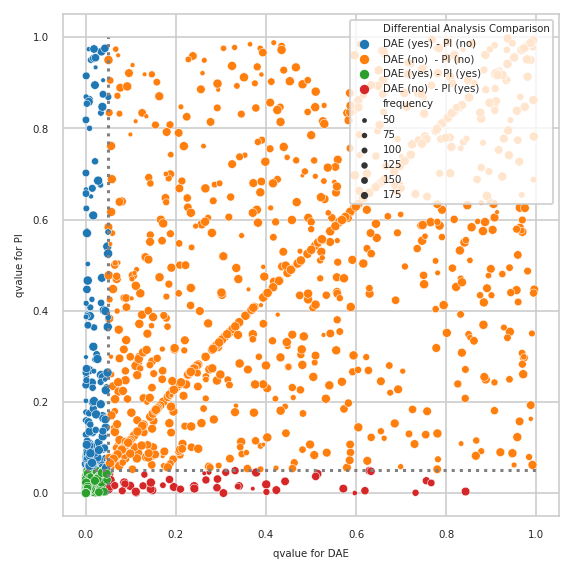

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.506


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/vaep/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out